# Tensors

* A generalization of matrices

## Vector

* One dimensional tensors

## Matrix

* 2-dimensional tensors




# Basic Single Layer Neural Networks With Vectors


NOTE:

torch.mm is more strict about the input shape as opposed to torch.matmul, which supports broadcasting, being able to give you a wrong output. 


* weights.reshape(a, b) - a new tensor with the same data as weights, but sometimes the actual data in memory isn't being changed and some other times it gives you a clone.
* weights.reshape_(a, b) - the underscore is an in-place operation. It's changing only the tensor in memory without touching the data. 
  If you request the size that is more or less than the original shape, you can cut off the
  original data
* weights.view(a, b) - always returns a new data without touching any of the data in memory. For an impossible shape, it returns an error. 

torch.mm(features, weights.view(5, 1) is equivalent to torch.sum(features * weights) and (features * weights).sum(), 
only if it's using vectors not matrices, but using torch function is most efficient.


In [0]:
import torch
import numpy as np

In [2]:
# To get the output as a probability
def sigmoid_activation(x):
  return 1/(1 + torch.exp(-x))


# Set the random seed so things are predictable
torch.manual_seed(7)

# Features are 5 random normal variable
# 1 row and 5 columns 
features = torch.randn((1, 5))

# create another tensor with the same shape as input
weights = torch.randn_like(features)

bias = torch.randn((1, 1))

print(features, weights, bias)

# To calculate the output of this network using the weights and bias

result = sigmoid_activation(torch.mm(features, weights.view(5, 1)) + bias)
print(result)
      

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]]) tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]]) tensor([[0.3177]])
tensor([[0.1595]])


# Basic Multilayer Neural Network With Matrices

In [3]:
torch.manual_seed(7)

features = torch.randn((1, 3))
n_input = features.shape[1]
n_hidden = 2
n_output = 1

# question: why does it not have (), but B1's do?
W1 = torch.randn((n_input, n_hidden))
W2 = torch.randn((n_hidden, n_output))

B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

hidden_output = sigmoid_activation(torch.mm(features, W1) + B1)
output = sigmoid_activation(torch.mm(hidden_output, W2) + B2)
print(output)

tensor([[0.3171]])


# Neural Network W/ MNIST

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

'''
Transforms: it does image transformations

Compose: common image transformations can be chanined together using Compose.
'''
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])
# Download and load the training data
trainset = datasets.MNIST('./', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

!wget https://github.com/gitskim/Pasion/raw/master/diving.mat
!wget https://raw.githubusercontent.com/gitskim/Pasion/master/Diving.txt

0it [00:00, ?it/s]

9920512it [00:03, 2556664.97it/s]                             


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 58340.20it/s]                           
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 955371.27it/s]                             
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 22135.80it/s]            
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


9920512it [00:02, 4343512.60it/s]                             


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 57314.80it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 959167.59it/s]                             
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 22065.86it/s]            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
--2019-08-20 04:09:55--  https://github.com/gitskim/Pasion/raw/master/diving.mat
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gitskim/Pasion/master/diving.mat [following]
--2019-08-20 04:09:56--  https://raw.githubusercontent.com/gitskim/Pasion/master/diving.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9591612 (9.1M) [application/octet-stream]
Saving to: ‘diving.mat’

diving.mat          100%[===================>]   9.15M  --.-KB/s    in 0.1s    

2019-08-20 04:10:00 (66.5 MB/s) - ‘diving.mat’ saved

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(type(labels))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


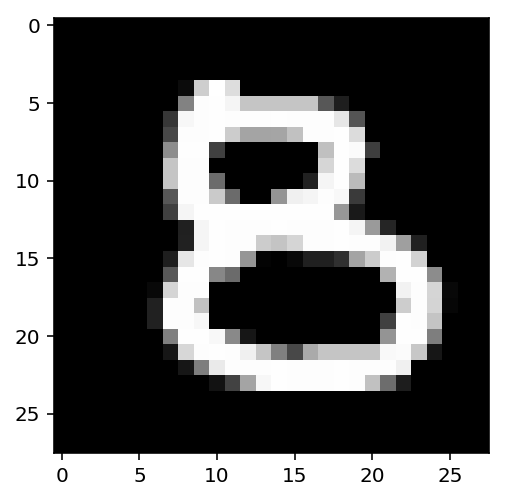

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');


torch.Size([64, 784])


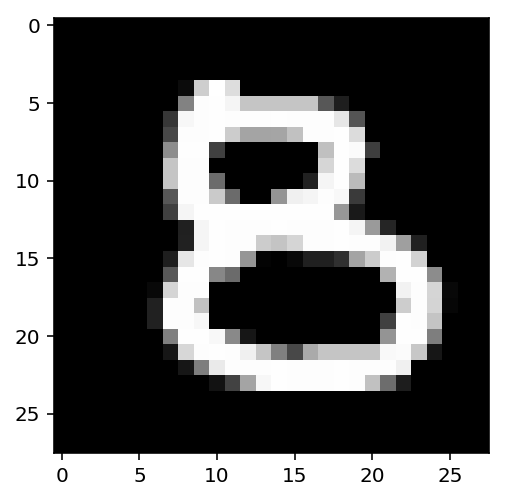

In [7]:
# flatten the input images
# question: how does it pack and unpack using view, so that it retreives exactly same image?
reshaped_images = images.view(64, 784)
print(reshaped_images.shape)
plt.imshow(reshaped_images[1].view(28, 28).numpy(), cmap='Greys_r');

input_size = 64
input_dim = 784
hidden_state_size = 256
output_size = 10
W1 = torch.randn((input_dim, hidden_state_size))
# Question: how can you create a bias vector not a matrix to add to the matrix?
B1 = torch.randn(hidden_state_size)

W2 = torch.randn((hidden_state_size, output_size))
B2 = torch.randn((output_size))

W1_calc = sigmoid_activation(torch.mm(reshaped_images, W1))

result = sigmoid_activation(torch.mm(W1_calc, W2) + B2)


* if no dimension is mentioned, it will sum every value in the matrix resulting in one value. 
* if dimension is 0, it sums over rows, so the result is a vector with total column number of entries.
Then each row will be divided by a different number.
* if dimension is 1, it sums over columns, so the result is a vector with total row number of entries. Then each column will **not be able to be divided by a different number** this column vector, because PyTorch doesn't enable division across rows, but only columns by default, which is called **broadcasting**. If you want to divide a matrix by a column vector, it has to be modified  to be a matrix. e.g. (9) should be modified to (9, 1) to divide the matrix of (9, anyint)



In [8]:
# see how summing in different dimension results into a different result
arr = np.array([[2, 3, 5], [5, 3, 2]], dtype=np.float)
arr = torch.tensor(arr)
print(arr)

msum = torch.sum(arr, dim=0)
print(msum.shape)
res = arr / msum
print(res)

# softmax
def softmax(x):
  print("inside softmax: %d", x.shape)
  denominator = torch.sum(torch.exp(x), dim=1)
  denominator_real = denominator.view(-1, 1)
  
  # question: what is the difference between (64) and (64, 1) visually?
  
  return torch.exp(x) / denominator_real
  
  
prob = softmax(result)

# do double check by summing over each row and making sure it is 1. 
print(torch.sum(prob, dim=1))

tensor([[2., 3., 5.],
        [5., 3., 2.]], dtype=torch.float64)
torch.Size([3])
tensor([[0.2857, 0.5000, 0.7143],
        [0.7143, 0.5000, 0.2857]], dtype=torch.float64)
inside softmax: %d torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Building Networks With PyTorch

1. You need to subclass it from **nn.Module**
2. You need to call **nn.Module**'s superclass

```c
class Network(nn.Module):
  def __init__(self):
    super().__init__()
```

3. Linear layer is the combination of weights and bias matrices. 


In [9]:
from torch import nn

class Network(nn.Module):
  def __init__(self, hidden1_input_size, hidden1_output_size, hidden2_output_size):
    super().__init__()
    self.hidden = nn.Linear(hidden1_input_size, hidden1_output_size)
    self.output = nn.Linear(hidden1_output_size, hidden2_output_size)
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=0)
  
  
  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x
   
    
model = Network(784, 256, 10)
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)


Another way to do this is to call <code>Sigmoid</code> from <code>import torch.nn.functional as F</code>. If you use it from nn, it creates objects and classes, but if you use it from functional, it won't create any objects and classes, because it simply does it functionally. 

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

# Sequential

In [44]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

criterion = nn.CrossEntropyLoss()

#question - learn more about next and iter
images, labels = next(iter(trainloader))

#labels = one_hot_encoding(labels, 10)
reshaped_images = images.view(images.shape[0], 784)
print(reshaped_images.shape)
prob = model(reshaped_images)
print(prob.shape)

loss = criterion(prob, labels)

print(loss)

torch.Size([64, 784])
torch.Size([64, 10])
tensor(2.2795, grad_fn=<NllLossBackward>)


In [49]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

#question - learn more about next and iter
images, labels = next(iter(trainloader))

#labels = one_hot_encoding(labels, 10)
reshaped_images = images.view(images.shape[0], 784)
print(reshaped_images.shape)
prob = model(reshaped_images)
print(prob.shape)

loss = criterion(prob, labels)

print(loss)

torch.Size([64, 784])
torch.Size([64, 10])
tensor(2.3261, grad_fn=<NllLossBackward>)


# Autograd

y = x^2

z = mean(y)

dz/dx = question: how to calculate it? x/2




In [50]:
x = torch.randn([2, 2], requires_grad=True)
y = x ** 2
z = y.mean()

print(y)
print(x.grad)


tensor([[1.0300, 1.4417],
        [0.0463, 0.0328]], grad_fn=<PowBackward0>)
None


In [47]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-1.0744,  0.4848],
        [ 0.2476, -0.0179]])
tensor([[-1.0744,  0.4848],
        [ 0.2476, -0.0179]], grad_fn=<DivBackward0>)


# Training the network

you need to send what you want to do gradient descent on. e.g. you want to update model's parameters, so you do the following and specify the learning rate. 

In [59]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


1. Make a forward pass through the network
2. Use the network output to calculate the loss
3. Perform a backward pass through the network to calculate the gradients
4. Take a step with the optimizer to update the weights

The folloing shows how the first linear layer's weight changes as the gradient descent is performed just once.

In [60]:
# 1
images, labels = next(iter(trainloader))
prob = model(images.view(-1, 784))

# 2
loss = criterion(prob, labels)
print("Initial weigths shape: -, weights : - ", model[0], model[0].weight)

# 3
loss.backward()
print("Gradients: - ", model[0].weight.grad)

# 4
optimizer.step()
print("After updates: - ", model[0].weight)

Initial weigths shape: -, weights : -  Linear(in_features=784, out_features=128, bias=True) Parameter containing:
tensor([[-0.0008,  0.0251,  0.0348,  ..., -0.0287, -0.0012, -0.0184],
        [-0.0053,  0.0109, -0.0030,  ...,  0.0240,  0.0301, -0.0075],
        [-0.0198, -0.0251,  0.0172,  ...,  0.0175,  0.0027,  0.0302],
        ...,
        [ 0.0156, -0.0184, -0.0172,  ..., -0.0302,  0.0027, -0.0034],
        [-0.0337, -0.0024,  0.0079,  ...,  0.0341, -0.0148,  0.0222],
        [ 0.0348, -0.0125, -0.0202,  ..., -0.0322, -0.0153, -0.0341]],
       requires_grad=True)
Gradients: -  tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0097,  0.0097,  0.0097,  ...,  0.0097,  0.0097,  0.0097],
        [-0.0110, -0.0110, -0.0110,  ..., -0.011

## Training Multiple Epochs (Putting it all together)

**VERY IMPORTANT**: When you have multiple passes to update the **same** parameters, gradients are **accumulated**. Therefore for each pass, you need to call <code>optimizer.zero_grad()</code>.

In [69]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), 0.003)
epochs = 5

for epoch in range(epochs):
  current_loss = 0
  
  for images, labels in trainloader:
    # 0. clean out the optimizer
    optimizer.zero_grad()
    
    # 1. Forward pass
    # Question: Figure out why I can't use images.reshape_((-1, 784))
    prob = model(images.view(-1, 784))
    
    # 2. calculate loss
    loss = criterion(prob, labels)
    current_loss += loss.item()/len(trainloader)
    
    # 3. calculate gradients
    loss.backward()
    
    # 4. Update parameters based on gradients
    optimizer.step()
    
    
  print("epoch: %d, current_loss: %f", epoch, current_loss)
    

epoch: %d, current_loss: %f 0 1.9098771924911533
epoch: %d, current_loss: %f 1 0.8632997169868266
epoch: %d, current_loss: %f 2 0.5284624109898546
epoch: %d, current_loss: %f 3 0.42913611832140347
epoch: %d, current_loss: %f 4 0.3850373007309463


# Verification Step

This step is equivalent to Keras' <code>predict</code>


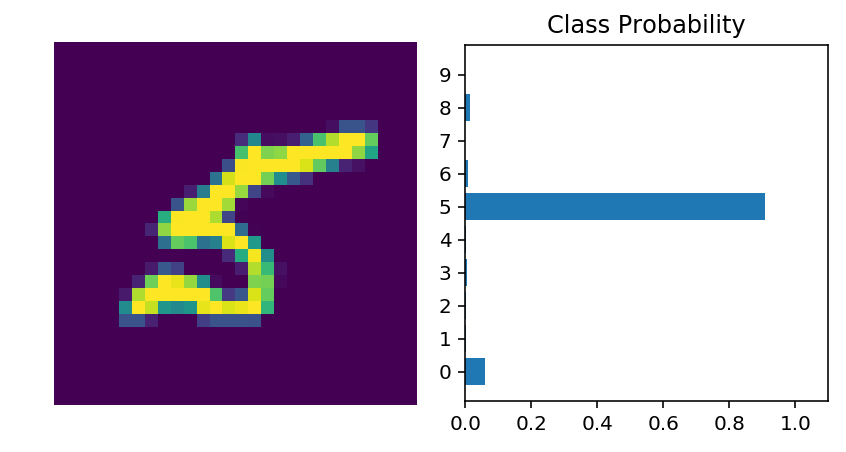

In [79]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    
    
images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
  log_ps = model(img)
  

output = torch.exp(log_ps)

view_classify(img, output)


NOTE: It turns out that networks tend to train a lot faster using ReLu instead of tanh or sigmoid activation functions .

In [0]:
import subprocess
import numpy as np
import os.path
import pickle
import scipy.io as sio

# TODO:
#ANNOTATION_FILE = '/home/suhyunkim011/Pasion/Diving.txt'
ANNOTATION_FILE = 'Diving.txt'

#MAT_FILE = '/home/suhyunkim011/Pasion/diving.mat'
MAT_FILE = 'diving.mat'

def get_pose_labels2():
    # move the pictures to a certain directory and create labels
    contents = sio.loadmat(MAT_FILE)
    # print(len(contents))
    tracked = contents['boxes_tracked_wholevideo']
    # print(tracked)
    # print(len(tracked))
    # (298387, 107)
    # print(tracked.shape)

    # print(tracked[0].shape)

    # batchsize = 298387; timesteps = 202; shape = 104;
    arr_frame = []
    arr_score = np.array([])
    arr_score_flat = []
    arr_difficulty = np.array([])
    arr_difficulty_flat = []

    with open(ANNOTATION_FILE) as filename:
        max_counter = 202
        group_counter = 0
        one_group_counter = 0
        max_one_group_counter = 202
        supposed_to_be_counter = 0
        for line in filename:
            # print(line)
            if '#' in line:
                continue

            if 'A' in line:

                group_counter += 1
                line_arr = line.split()
                # print(line_arr[0])
                # print(line_arr[1])
                start = -1
                end = -1

                for i in range(0, 2):
                    if i == 0:
                        start = line_arr[0]
                        start = int(start)

                    elif i == 1:
                        end = line_arr[1]
                        end = int(end)

                start = start - 1

                pose_group = np.zeros([202, 104])

                for i in range(start, end + 1):
                    supposed_to_be_counter += 1
                    converted = tracked[i][:104]
                    pose_group[one_group_counter, :] = converted
                    one_group_counter += 1

                if one_group_counter > max_one_group_counter:
                    max_one_group_counter = one_group_counter
                    print("-------------*********-----------------WARNING-------------*********-----------------: %d", one_group_counter)
                # len(pose_group): 169; one_group_counter: 169; max_one_group_counter: 202

                # print(pose_group)
                arr_frame.append(pose_group)  # figure out why it worked when I put it above the if one_group_counter > max_one_group_counter:
                one_group_counter = 0

            if 'Score' in line:
                line_arr = line.split()
                arr_sub_total_score = np.empty(max_counter)
                arr_sub_total_score.fill(line_arr[2])

                arr_sub_difficulty_score = np.empty(max_counter)
                arr_sub_difficulty_score.fill(line_arr[3])

                arr_score = np.append(arr_score, arr_sub_total_score)
                arr_difficulty = np.append(arr_difficulty, arr_sub_difficulty_score)
                # print(arr_sub_total_score)

                arr_score_flat.append(float(line_arr[2]))
                arr_difficulty_flat.append(float(line_arr[3]))

        # print(f'arr_frame: {len(arr_frame)}, arr_score_flat: {len(arr_score_flat)}, arr_difficulty_concat: {len(arr_difficulty_flat)}')
        # print(f'arr_frame: {len(arr_frame)}')
        # print(arr_frame[71])
        print(np.array(arr_frame).shape)
    return np.array(arr_frame), np.array(arr_score_flat), arr_difficulty_flat
